In [1]:
# Import necessary libraries
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data 
df = pd.read_csv("../data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# checking NA 
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# remove outlier if any 
def remove_outliers_iqr_all(df):
    numeric_cols = df.select_dtypes(include='number').columns
    mask = pd.Series([True] * len(df), index=df.index)  

    for col in numeric_cols:
        data = df[col].dropna()
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask &= (df[col] >= lower) & (df[col] <= upper)

    return df[mask]  
df = remove_outliers_iqr_all(df)
print("Before cleaning", df.shape)
print("After cleaning", df.shape)

Before cleaning (198, 5)
After cleaning (198, 5)


In [5]:
# pick just the numerical columns becaues the model is accepting only numerical data
df.drop("CustomerID" , inplace=True , axis=1)
df = df.select_dtypes(include=['float64', 'int64'])

In [6]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
193,38,113,91
194,47,120,16
195,35,120,79
196,45,126,28


In [7]:
# The model is sensitive to feature scales, so we should scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

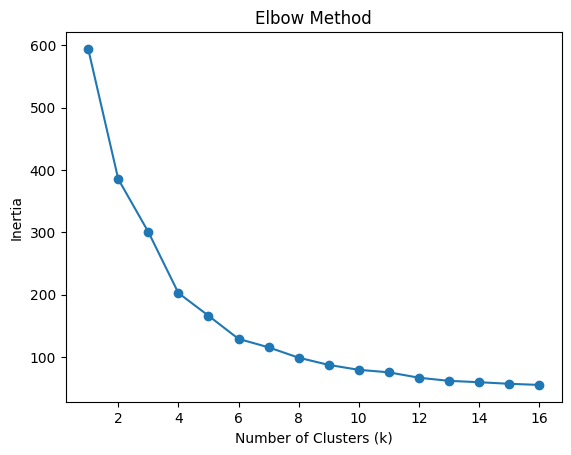

In [8]:
# we will try several inertias to find the best k 
inertia = []
K = range(1, 17)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

# draw the elbow 
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5 , random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [10]:
df["Cluster"] = clusters

In [11]:
df

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
193,38,113,91,1
194,47,120,16,4
195,35,120,79,1
196,45,126,28,4


In [12]:
df["Cluster"].value_counts()

Cluster
0    58
3    46
1    39
4    30
2    25
Name: count, dtype: int64

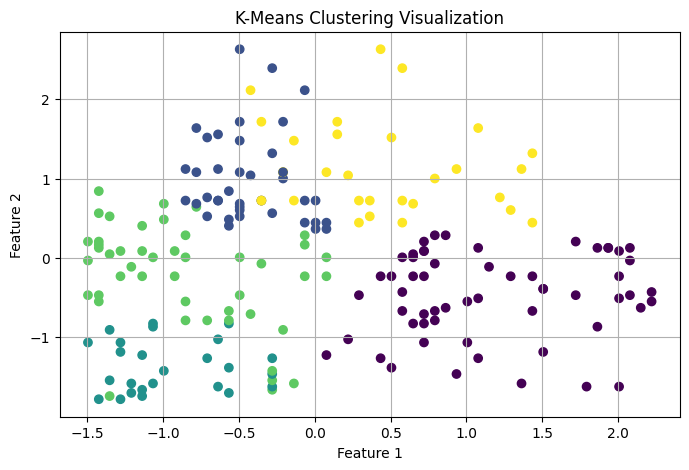

In [15]:
import matplotlib.pyplot as plt

# Ensure the 'Cluster' column exists
if 'Cluster' in df.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df["Cluster"], cmap='viridis')
    plt.title("K-Means Clustering Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()
else:
    print("⚠️ 'Cluster' column is not found in the DataFrame.")

